# SVM - Support Vector Machines

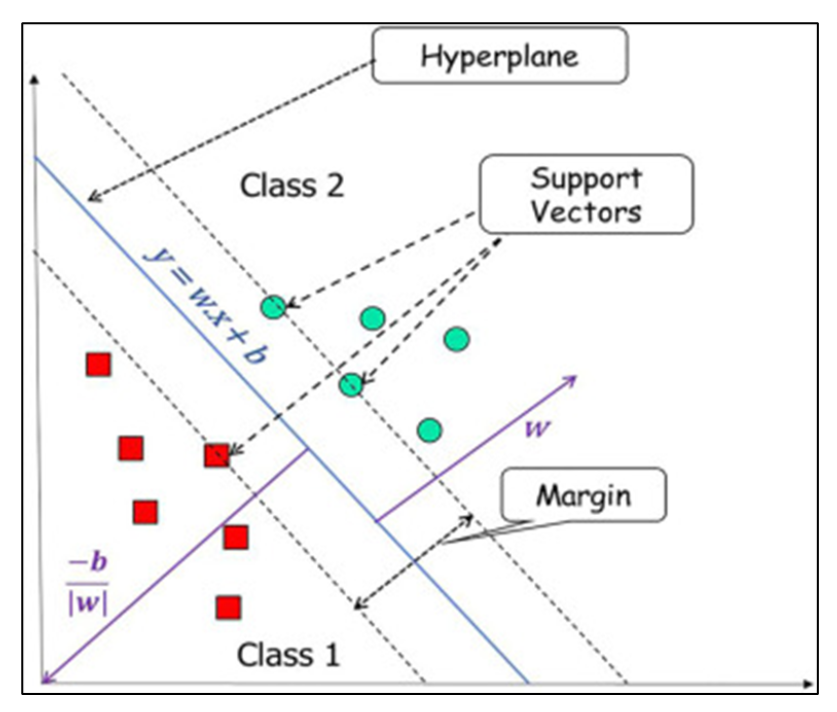

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Iris Dataset

In [3]:
import pandas as pd 
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Seperate X and Y(species)

In [7]:
x = df.drop(columns=['species'])
y = df[['species']]

In [8]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply preprocessing on X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
x_pre = num_pipe.fit_transform(x)

In [13]:
x_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Apply Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.33, random_state=21)

In [15]:
xtrain.shape

(100, 4)

In [16]:
xtest.shape

(50, 4)

### Create a SVM model

In [17]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(xtrain, ytrain)

SVC(probability=True)

In [18]:
model.score(xtrain, ytrain)

0.97

In [19]:
model.score(xtest, ytest)

0.92

### Predict the results for train and test

In [20]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [21]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [22]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [23]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [24]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Plot the Confusion Matrix

In [25]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

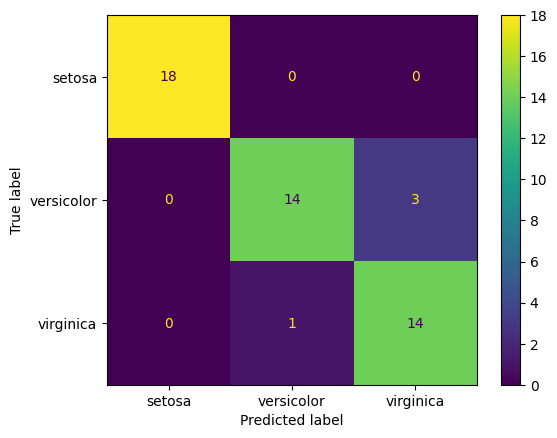

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Print classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      0.82      0.87        17
   virginica       0.82      0.93      0.87        15

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



#### Model has good f1 score i.e 92%. Hence its a good model.

### Predicting out of sample data


In [28]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


### Performing pre.trasform

In [29]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


### Predict the results with Probability

In [30]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [31]:
probs = model.predict_proba(xnew_pre)
probs

array([[0.00887943, 0.94607293, 0.04504764],
       [0.00989264, 0.00994123, 0.98016613],
       [0.02391519, 0.9569555 , 0.01912931],
       [0.61787998, 0.2823035 , 0.09981652],
       [0.0135561 , 0.24037202, 0.74607188],
       [0.94698989, 0.03049312, 0.02251699],
       [0.03871007, 0.95135693, 0.009933  ],
       [0.00930502, 0.02360441, 0.96709057],
       [0.95085926, 0.02801251, 0.02112822],
       [0.75977361, 0.17954739, 0.06067901],
       [0.01196399, 0.97846828, 0.00956774],
       [0.01364985, 0.96514746, 0.02120269],
       [0.01377429, 0.01011422, 0.97611148],
       [0.01718618, 0.72224256, 0.26057126],
       [0.01740736, 0.1563846 , 0.82620804]])

In [32]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
import numpy as np 
max_probs = np.max(probs, axis=1)

In [34]:
max_probs

array([0.94607293, 0.98016613, 0.9569555 , 0.61787998, 0.74607188,
       0.94698989, 0.95135693, 0.96709057, 0.95085926, 0.75977361,
       0.97846828, 0.96514746, 0.97611148, 0.72224256, 0.82620804])

### Save above results in xneew dataframe

In [35]:
xnew['species_pred'] = preds
xnew['prob'] = max_probs

In [36]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.946073
1,6.9,3.1,5.1,2.3,virginica,0.980166
2,5.1,2.5,3.0,1.1,versicolor,0.956956
3,4.4,2.9,NaN,0.2,setosa,0.617880
4,5.9,3.0,5.1,1.8,virginica,0.746072
5,5.5,3.5,1.3,0.2,setosa,0.946990
6,5.6,NaN,3.6,1.3,versicolor,0.951357
7,6.5,3.0,5.2,2.0,virginica,0.967091
8,5.3,3.7,1.5,0.2,setosa,0.950859
9,5.1,3.4,1.5,NaN,setosa,0.759774


### Save above results in csv format

In [37]:
xnew.to_csv('SVMresults.csv', index= False)